In [2]:
import matplotlib.pyplot as plt
import tensorflow.keras.losses as losses
import numpy as np
from tensorflow.keras.utils import plot_model
from validation import *

## UPAE

In [1]:
#run UPAE
%run main.py --u

/home/cara/.local/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2023-05-11 19:22:33.096638: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-05-11 19:22:33.156274: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-05-11 19:22:33.158737: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-11 19:22:34.733289: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


Shuffling Dataset

Splitting Dataset

Processing training images



100%|██████████| 624/624 [00:09<00:00, 67.20it/s]



Processing validation images




100%|██████████| 78/78 [00:01<00:00, 50.43it/s]



Processing testing images




100%|██████████| 858/858 [00:12<00:00, 67.00it/s]


2023-05-11 19:23:02.954603: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:266] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


Vanilla AE
Epoch 1/3
UPAE Training
UPAE Training
9/9 [==============================] - ETA: 0s - total_loss: : 7353.0679 - loss1: : 7353.0414 - loss2: : 0.0264 - binary_crossentropy: : 2481328.2778 - accuracy: : 1.0521e-04UPAE Validation
UPAE Loss
9/9 [==============================] - 27s 3s/step - total_loss: : 7360.4535 - loss1: : 7360.4275 - loss2: : 0.0260 - binary_crossentropy: : 2493331.6750 - accuracy: : 1.0321e-04 - val_total_loss: : 8100.8555 - val_loss1: : 8100.8486 - val_loss2: : 0.0066 - val_binary_crossentropy: : 2891712.0000 - val_accuracy: : 9.3501e-05
Epoch 2/3
9/9 [==============================] - 20s 2s/step - total_loss: : 6949.7976 - loss1: : 6949.7830 - loss2: : 0.0146 - binary_crossentropy: : 2638782.5500 - accuracy: : 8.2907e-05 - val_total_loss: : 7864.4785 - val_loss1: : 7864.4390 - val_loss2: : 0.0393 - val_binary_crossentropy: : 2653615.0000 - val_accuracy: : 9.3501e-05
Epoch 3/3
2/2 [==============================] - 1s 227ms/step - total_loss: : 6850.754

In [5]:
history_train.history

{'total_loss: ': [7426.923828125, 6830.6728515625, 6752.03173828125],
 'loss1: ': [7426.90185546875, 6830.646484375, 6751.97021484375],
 'loss2: ': [0.022071056067943573, 0.026161041110754013, 0.06200108304619789],
 'binary_crossentropy: ': [2601362.25, 2580634.75, 2231433.0],
 'accuracy: ': [8.52188968565315e-05,
  8.230149251176044e-05,
  8.245504432125017e-05],
 'val_total_loss: ': [8100.85546875, 7864.478515625, 7624.15380859375],
 'val_loss1: ': [8100.8486328125, 7864.43896484375, 7624.0439453125],
 'val_loss2: ': [0.006624073721468449,
  0.039285559207201004,
  0.11012236773967743],
 'val_binary_crossentropy: ': [2891712.0, 2653615.0, 2099289.0],
 'val_accuracy: ': [9.350066829938442e-05,
  9.350066829938442e-05,
  9.52321570366621e-05]}

### Validation

Image saved as learning_curve.png


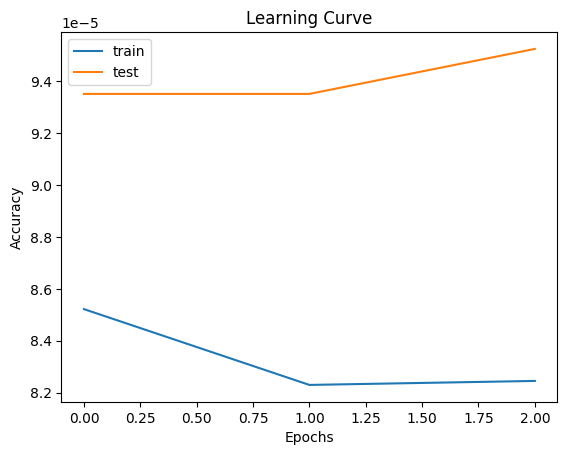

In [6]:
valid_plot.learning_curve()

Image saved as valid_loss.png


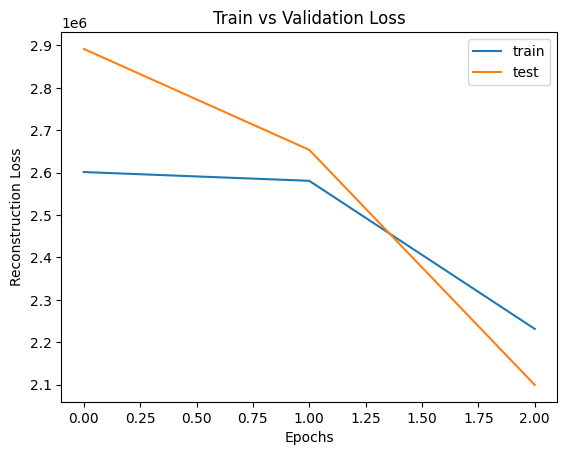

In [7]:
valid_plot.valid_loss()

### Testing

In [6]:
#testing using testing set
input_images= image_datasets[2] 
generated = model.predict(input_images)
generated = np.array(generated)

2023-05-10 22:58:50.070237: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 224919552 exceeds 10% of free system memory.
2023-05-10 22:58:50.280305: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 224919552 exceeds 10% of free system memory.
2023-05-10 22:58:50.388900: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 224919552 exceeds 10% of free system memory.
2023-05-10 22:58:50.503724: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 224919552 exceeds 10% of free system memory.
2023-05-10 22:58:50.607550: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 112459776 exceeds 10% of free system memory.


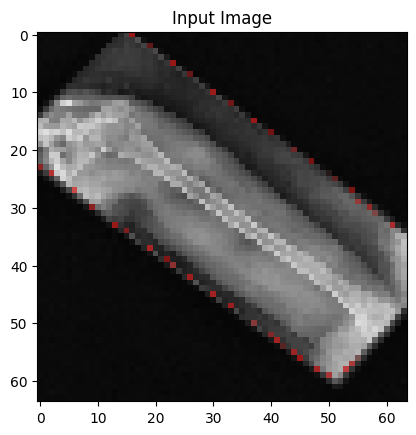

In [8]:
#input image
plt.imshow(image_datasets[2][4])
plt.title("Input Image")
plt.show()

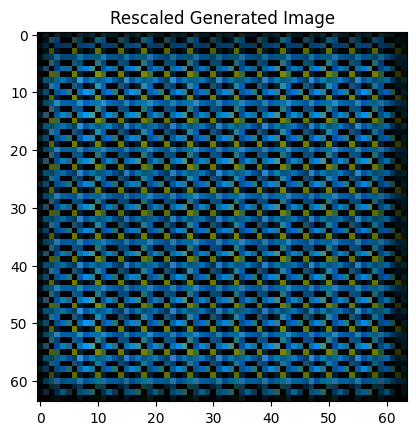

In [11]:
#rescaled generated image
generated_rescaled = (generated[0] - generated[0].min()) / (generated[0].max() - generated[0].min())
plt.imshow(generated_rescaled.reshape(64,64,3))
plt.title("Rescaled Generated Image")
plt.show()

## Vanilla AE

In [2]:
%run main.py 

Shuffling Dataset

Splitting Dataset

Processing training images



100%|██████████| 624/624 [00:08<00:00, 70.43it/s]




Processing validation images



100%|██████████| 78/78 [00:01<00:00, 64.72it/s]




Processing testing images



100%|██████████| 858/858 [00:11<00:00, 73.05it/s]




Training AE model
Vanilla AE
Decoder
Epoch 1/10
Vanilla Loss
Vanilla Loss
10/10 [==============================] - 25s 2s/step - mse_loss: 9043.2900 - binary_crossentropy: : 233036.1275
Epoch 2/10
10/10 [==============================] - 24s 2s/step - mse_loss: 7458.9054 - binary_crossentropy: : 1896079.1818
Epoch 3/10
10/10 [==============================] - 25s 3s/step - mse_loss: 7449.9169 - binary_crossentropy: : 1505031.3409
Epoch 4/10
10/10 [==============================] - 25s 3s/step - mse_loss: 6546.1683 - binary_crossentropy: : -584708.1136
Epoch 5/10
10/10 [==============================] - 23s 2s/step - mse_loss: 5997.2088 - binary_crossentropy: : -602111.0682
Epoch 6/10
10/10 [==============================] - 22s 2s/step - mse_loss: 5610.7263 - binary_crossentropy: : -909994.6989
Epoch 7/10
10/10 [==============================] - 22s 2s/step - mse_loss: 5799.6424 - binary_crossentropy: : -1200152.5000
Epoch 8/10
10/10 [==============================] - 22s 2s/step - m

### Validation VAE

In [2]:

train_loss = history_train.history['binary_crossentropy: ']
valid_loss = history_valid.history['binary_crossentropy: ']

pyplot.plot(train_loss , label='train')
pyplot.plot(valid_loss , label='test')
pyplot.title('Train vs Validation Loss')
pyplot.xlabel('Epochs')
pyplot.ylabel('Reconstruction Loss')
pyplot.legend()
pyplot.show()


NameError: name 'pyplot' is not defined

In [ ]:
train_loss = history_train.history['accuracy: ']
valid_loss = history_valid.history['accuracy: ']

pyplot.plot(train_loss , label='train')
pyplot.plot(valid_loss , label='test')
pyplot.title('Learning Curve')
pyplot.xlabel('Epochs')
pyplot.ylabel('Accuracy')
pyplot.legend()
pyplot.show()

### Testing VAE

In [ ]:
#testing using testing set
input_images= image_datasets[2] 
generated = model.predict(input_images)
generated = np.array(generated)

In [ ]:
#getting mean reconstruction error score for the images tested
re_score = losses.mean_squared_error(input_images, generated)
re_score = np.mean(re_score)
print("reconstruction error score:", re_score)

In [ ]:
#input image
plt.imshow(image_datasets[2][4])
plt.title("Input Image")
plt.show()